In [1]:
import numpy as np
import matplotlib.pyplot as plt

import sys, os
os.environ['COBAYA_NOMPI'] = 'True'
sys.path.append('/global/cscratch1/sd/sfschen/boss_analysis_joint/lss_likelihood/')

In [2]:
from cobaya.yaml          import yaml_load_file
from cobaya.samplers.mcmc import plot_progress
#
from getdist.mcsamples    import MCSamplesFromCobaya
from getdist.mcsamples    import loadMCSamples
import getdist.plots      as     gdplt
from cobaya.model import get_model

#
import os

z1 vs z3

In [3]:
planck_samples = loadMCSamples('/global/cscratch1/sd/mwhite/Fitting/CobayaLSS/chains/planck18',\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95] })

In [4]:
pkz1_info = yaml_load_file("yamls/joint_z1.yaml")

pkz1_samples = loadMCSamples(os.path.abspath(pkz1_info["output"]),\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95]})
print(pkz1_samples.getGelmanRubin())

0.028618251768720182


In [5]:
pkz3_info = yaml_load_file("yamls/joint_z3.yaml")

pkz3_samples = loadMCSamples(os.path.abspath(pkz3_info["output"]),\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95]})
print(pkz3_samples.getGelmanRubin())

0.0402233226982697


In [6]:
joint_info = yaml_load_file("yamls/joint_boss.yaml")

joint_samples = loadMCSamples(os.path.abspath(joint_info["output"]),\
                        settings={'ignore_rows':0.3, 'contours': [0.68, 0.95]})
print(joint_samples.getGelmanRubin())

0.028035779877576474


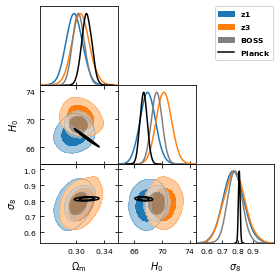

In [7]:
# Plot Together!
gdplot = gdplt.get_subplot_plotter()
gdplot = gdplt.get_subplot_plotter(width_inch=4)
gdplot.settings.axes_fontsize=12
gdplot.settings.legend_fontsize=12

gdplot.triangle_plot([pkz1_samples, pkz3_samples,joint_samples, planck_samples],\
                     ["omegam","H0","sigma8"],\
                     filled=[True,True,True,False],\
                     alphas = [1.0, 1.0, 0.7, 1.0],\
                     contour_lws=1.5,\
                     contour_args=[{'color':'C0','ls':'-'},\
                                   {'color':'C1','ls':'-'},\
                                   {'color':'gray','ls':'-'},\
                                   {'color':'k','ls':'-'}],\
                     line_args=[{'color':'C0','ls':'-'},\
                                {'color':'C1','ls':'-'},\
                                {'color':'gray','ls':'-'},\
                                {'color':'k','ls':'-'}],\
                     linewidth_contour=3,\
                     legend_labels = [r"$\bf{z1}$",r"$\bf{z3}$",r"$\bf{BOSS}$",r"$\bf{Planck}$"])

plt.savefig('Figures/z13_consistency.pdf')